## Precomputation for $\kappa_{GMF}$

Precompute the values of $\kappa_{GMF}$, which defines the deflection between the UHECR arrived at earth $\omega$ and those after back propagation in the galactic magnetic field (GMF) $\omega_{GMF}$. This is precomputed for each composition and stored in the relevant group in `UHECRdata.h5`.

**NOTE:** This only needs to be computed once. Eventually we will set up a flag so that this would not compute when it is already computed.

In [16]:
import os
import h5py
import numpy as np

from fancy import Uhecr
from fancy.interfaces.stan import coord_to_uv

uhecr_file = "UHECRdata.h5"

# type of detector / UHECR dataset
# choose from ["TA2015", "auger2014", "auger2010"]
uhecr_label = "TA2015"

# initialize the Uhecr object
uhecr = Uhecr()

In [17]:
with h5py.File(uhecr_file, "r+") as f:
    print(f.keys())
    del f[uhecr_label]["kappa_gmf"]
    print(f[uhecr_label].keys())

<KeysViewHDF5 ['TA2015', 'auger2010', 'auger2014']>
<KeysViewHDF5 ['day', 'dec', 'energy', 'glat', 'glon', 'ra', 'theta', 'year']>


In [18]:
'''Open the UHECR file'''
with h5py.File(uhecr_file, 'r+') as f:

    data = f[uhecr_label]
    
    uhecr.label = uhecr_label
    uhecr.year = data['year'][()]
    uhecr.day = data['day'][()]
    uhecr.zenith_angle = np.deg2rad(data['theta'][()])
    uhecr.energy = data['energy'][()]
    uhecr.N = len(uhecr.energy)
    glon = data['glon'][()]
    glat = data['glat'][()]
    uhecr.coord = uhecr.get_coordinates(glon, glat)

    uhecr.unit_vector = coord_to_uv(uhecr.coord)
    uhecr.period = uhecr._find_period()
    uhecr.A = uhecr._find_area(1.)

In [21]:
'''Build the kappa_gmf tables for all particles given in uhecr.nuc_tables'''
uhecr.build_kappa_gmf(uhecr_file, particle_type="all", args=(100, "PT11", False))

Precomputing kappa_gmf for each composition: 100%|██████████| 9/9 [00:02<00:00,  3.09it/s]


In [22]:
'''Check if we computed it correctly'''

ptypes = ["p", "He", "N", "Si", "Fe"]

gmf_model = "PT11"

kappa_gmf_list = []
lonlats_true_list = []
lonlats_rand_list = []
lonlats_defl_list = []

for ptype in ptypes:
    with h5py.File(uhecr_file, "r") as f:
        print(f[uhecr_label].keys())

        print("kappa_gmf keys:")
        print(f[uhecr_label]["kappa_gmf"].keys())
        print(f[uhecr_label]["kappa_gmf"][gmf_model]["p"].keys())

        print(f[uhecr_label]["kappa_gmf"][gmf_model]["p"]["kappa_gmf"][()].shape)


        kappa_gmf_list.append(f[uhecr_label]["kappa_gmf"][gmf_model][ptype]["kappa_gmf"][()])
        lonlats_true_list.append(f[uhecr_label]["kappa_gmf"][gmf_model][ptype]["omega_true"][()])
        lonlats_rand_list.append(f[uhecr_label]["kappa_gmf"][gmf_model][ptype]["omega_rand"][()])
        lonlats_defl_list.append(f[uhecr_label]["kappa_gmf"][gmf_model][ptype]["omega_gal"][()])

<KeysViewHDF5 ['day', 'dec', 'energy', 'glat', 'glon', 'kappa_gmf', 'ra', 'theta', 'year']>
kappa_gmf keys:
<KeysViewHDF5 ['JF12', 'PT11']>
<KeysViewHDF5 ['kappa_gmf', 'kappa_gmf_rand', 'omega_gal', 'omega_rand', 'omega_true']>
(72,)
<KeysViewHDF5 ['day', 'dec', 'energy', 'glat', 'glon', 'kappa_gmf', 'ra', 'theta', 'year']>
kappa_gmf keys:
<KeysViewHDF5 ['JF12', 'PT11']>
<KeysViewHDF5 ['kappa_gmf', 'kappa_gmf_rand', 'omega_gal', 'omega_rand', 'omega_true']>
(72,)
<KeysViewHDF5 ['day', 'dec', 'energy', 'glat', 'glon', 'kappa_gmf', 'ra', 'theta', 'year']>
kappa_gmf keys:
<KeysViewHDF5 ['JF12', 'PT11']>
<KeysViewHDF5 ['kappa_gmf', 'kappa_gmf_rand', 'omega_gal', 'omega_rand', 'omega_true']>
(72,)
<KeysViewHDF5 ['day', 'dec', 'energy', 'glat', 'glon', 'kappa_gmf', 'ra', 'theta', 'year']>
kappa_gmf keys:
<KeysViewHDF5 ['JF12', 'PT11']>
<KeysViewHDF5 ['kappa_gmf', 'kappa_gmf_rand', 'omega_gal', 'omega_rand', 'omega_true']>
(72,)
<KeysViewHDF5 ['day', 'dec', 'energy', 'glat', 'glon', 'kappa_gm

In [9]:
ptype_idx = int(np.argwhere([ptype == "Fe" for ptype in ptypes])[0])

# np.all(kappa_gmf_list[ptype_idx] < 0)
kappa_gmf_list[ptype_idx]

array([1.00000000e-10, 1.00000000e-10, 7.17004251e+00, 3.23527131e+01,
       1.65688886e+02, 4.53686106e+00, 1.16782286e+02, 7.23858157e+00,
       4.61240214e+00, 1.65490114e+00, 2.39892472e-01, 4.70173326e-01,
       1.17596550e-01, 3.56198774e+01, 9.14356557e+00, 1.89033861e+00,
       5.06795184e-01, 1.00000000e-10, 1.06481688e+01, 7.38455010e+00,
       4.30522906e+02, 1.55463141e+01, 2.16959416e+00, 2.14522493e+00,
       2.96892501e-01, 1.00000000e-10, 1.00000000e-10, 1.64509121e+00,
       1.00000000e-10, 1.77478428e+00, 3.08834983e+01, 6.74212800e-01,
       3.29065625e-01, 1.00000000e-10, 3.27102497e+00, 2.54506801e-01,
       1.46054470e+00, 3.88249228e+01, 1.74773848e+00, 1.18048225e+02,
       8.52308891e+00, 1.37510633e+00, 4.50244940e+00, 1.22859659e+00,
       2.04765910e+00, 2.28562932e+01, 2.63746091e-01, 2.54186337e+00,
       8.13579830e-01, 1.32584623e+00, 1.00000000e-10, 2.09890964e+00,
       2.34294418e+00, 4.54157638e+00, 7.34358004e-01, 1.00000000e-10,
      

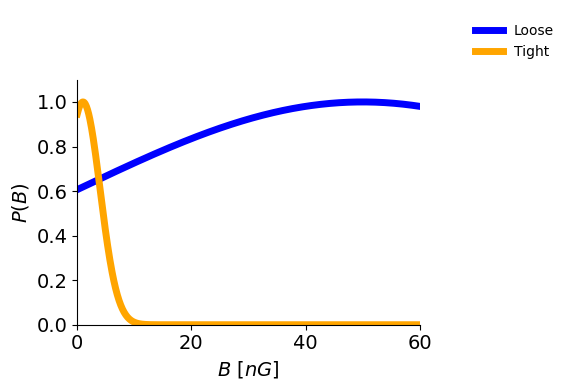

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.stats as stats

x = np.linspace(0, 100, 1000)
y = stats.norm.pdf(x, 50, 50)
y = y / np.max(y)

y1 = stats.norm.pdf(x, 1, 3)
y1 = y1 / np.max(y1)

fig, ax = plt.subplots(figsize=(6,4))


ax.plot(x, y, lw=5.0, color="b", label="Loose")
ax.plot(x, y1, lw=5.0, color="orange", label="Tight")
ax.set_xlabel(r"$B$ [$nG$]", fontsize=14)
ax.set_ylabel(r"$P(B)$", fontsize=14)

# ax.set_xticks(np.arange(0, 70, 10, dtype=int))
# ax.set_yticks(np.arange(0, 1.2, 0.2))

# ax.set_xticklabels(np.arange(0, 70, 10, dtype=int), fontsize=14)
# ax.set_xticklabels(np.arange(0, 1.2, 0.2), fontsize=14)
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.set_xlim([0, 60])
ax.set_ylim([0, 1.1]);
# plt.show()

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.legend(bbox_to_anchor=(1.1, 1), borderpad=1.0, frameon=False)

fig.tight_layout()





plt.show()
fig.savefig("B_gaussian_plot_legend.png", dpi=300)
# help(np.random.normal)